In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import Joint, SegmentList
from trajectory.plot import *
import matplotlib.pyplot as plt
from copy import deepcopy
import pandas as pd
import numpy as np

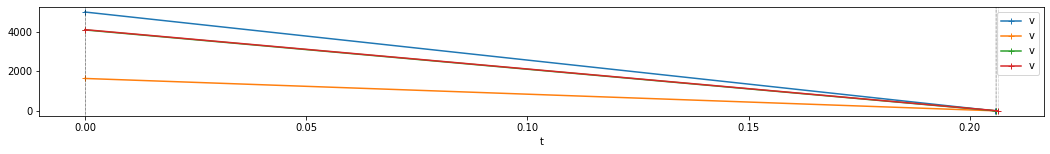

In [2]:
# Failed to converge in planning due to small segments. added halving
# v_0 when block is too long post-planning to fix. 
from trajectory.planner import Segment, Joint

j = Joint(5_000, 50_000)

block_params = [
 (379, 4998, 0),
 (110, 3277, 0),
 (771, 4092, 0),
 (275, 4107, 0)]

blocks = [j.new_block(*bp) for bp in block_params]
s = Segment(0,blocks).init()
s.plan()
s.plot()

In [3]:
for dt in np.linspace(1.01, 2, num=10):
    self =j.new_block(10,500,0).init()
    nt = self.t*dt
    self.plan(nt)
    print(f"{(self.t-nt):+5.6f}", self.v_0, self.v_1)

-0.000152 500 0
-0.000621 500 0
+0.000136 500 0
-0.000190 250.0 0
-0.000257 500 0
-0.000180 250.0 0
+0.000029 125.0 0
-0.000838 125.0 0
-0.000217 500 0
-0.000725 250.0 0


In [4]:
# Too many planning updates for sid=1.
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4
sl = SegmentList(joints)   

sl.move([743, 360, 544, 0])
sl.move([141, 76, -475, 391])


sl.plot()

AttributeError: 'Segment' object has no attribute 'next'

In [ ]:
# Too many planning updates for sid=1.
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)   
s = sl.move([1000,100])
s = sl.move([100,1000])


sl.plot()

In [ ]:
# Too many planning updates for sid=1.
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4

sl = SegmentList(joints)  

sl.move([-538, 372, 539, 920])
sl.move([-359, 308, 562, 838])
sl.move([-497, 631, 409, -861])
sl.move([-479, 298, 109, -874])
sl.move([-203, 557, 0, 495])
sl.move([-112, 683, 0, 0])
sl.move([257, 130, 751, 0])

sl.plot()

In [ ]:
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4

sl = SegmentList(joints) 

sl.move([264, 0, 700, 849])
sl.move([459, 0, 158, 689])
sl.move([-458, 74, -996, 431])

sl.plot()


Here is what the above trajectory looked like before: 


In [ ]:
# Unsolvable profile. Changing the first move distance by 1 avoids the error. 
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4
sl = SegmentList(joints)


sl.rmove([367, -200, 187, 172])

sl.plot()


In [ ]:
# Unsolvable profile. Changing the first move distance by 1 avoids the error. 
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4
sl = SegmentList(joints)



sl.rmove([0, 0, 747, 594])
sl.rmove([864, -39, 0, 61])


sl.plot()

In [ ]:
# Negative t_c after planning ramp
(tf, x, v_0, v_1) = 1.01, 500,1000,1000
j = Joint(5_000, 50_000)
self = self = j.new_block(x, v_0, v_1).init()
self.plan_ramp(self.t)
print(self)

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import accel_xt, binary_search
import pandas as pd 

def err(v_c):
    x_a, t_a = accel_xt(self.v_0, v_c, self.joint.a_max)
    t_c = self.t - t_a

    x_c = v_c * t_c
    x_err = self.x - (x_a + x_c)

    return x_err

df = pd.DataFrame([{'v_c': v_c, 'e':err(v_c)} for v_c in range(0, 5_000)]).set_index('v_c')
df.plot()

In [ ]:
# Math domain error in planning ramp. 
# x=502 fails, but x=503 succeedes, as does 499
from trajectory.plot import * 
(x, v_0, v_1, tf) = 499, 2000, 4500, 1.01
j = Joint(5_000, 50_000)
self = j.new_block(x, v_0, v_1).init()
t = self.t
self.plan(t * tf)
self.plan_ramp(t*tf)
print(self)
plot_params(self)

In [ ]:
%reload_ext autoreload
%autoreload 2
%run startup.py

from trajectory.planner import Joint, SegmentList
from trajectory.plot import *
from random import random, randint

j = Joint(5_000, 50_000)
n = 4
joints = [j]*n
signs = [1]*n

sl = SegmentList(joints)  

move_sets = [[347, 379, 316, 66], [373, 883, 0, 328], [578, 537, -762, 641], [66, 232, -616, 590], [246, 0, -611, 134]]
move_sets = [[798, 453, 0, 232], [474, 657, 0, 576], [0, -758, 330, 992], [-184, 371, 497, 597], [33, 248, 15, 576]]
move_sets = [[-634, 0, 970, 359], [-299, 0, 70, 795], [637, 0, 549, 33], [950, -803, 237, 199], [0, -139, 224, -760]]
move_sets = [[-334, -425, 0, -992], [-449, -827, -920, 0], [-499, -978, 465, -963], [-394, -657, 777, 0], [-903, -430, 45, -977]]
move_sets = [[-619, -980, 340, -698], [-428, -162, 781, -76], [-313, -44, 0, -531], [295, 90, 934, -743], [781, 728, 734, -336]]
move_sets = [[0, 652, 0, -239], [-505, 393, -382, -747], [-103, 342, -911, -881], [-451, 391, -946, -97], [-832, 715, -498, -427]]


def set_mean_bv(ps,cs):
    
    for p, c in zip(ps.blocks, cs.blocks):  
        p.v_1 = p.v_0 = (p.v_c+c.v_c)/2

    
def f():
    for i, moves in list(enumerate(move_sets)):
        print(i, moves)
        sl.move(moves)
f()


ds = list(sl.discontinuities())

print("Got", len(ds), 'discontinuities') 

df = sl.dataframe
sl.plot()
print([ (c.id, round(c.v_1), round(n.v_0)) for c, n in ds])